## Linear regrassion

In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

## Normalization

In [3]:
x_b = np.c_[np.ones((100,1)),X]
theta_best = (np.linalg.inv(x_b.T.dot(x_b))).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[4.56479017],
       [2.98254156]])

In [5]:
X_new = np.array([[0],[2]])
X_b_new = np.c_[np.ones((2,1)),X_new]
y_predict = X_b_new.dot(theta_best)

In [6]:
y_predict

array([[ 4.56479017],
       [10.52987329]])

In [7]:
import matplotlib.pyplot as plt

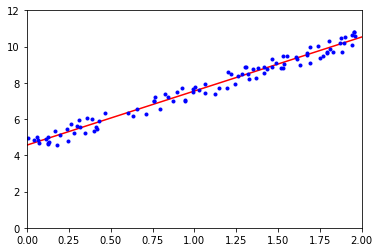

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,12])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.56479017]), array([[2.98254156]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.56479017],
       [10.52987329]])

## Partial inverse

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.56479017],
       [2.98254156]])

## Batch gradient Descent

In [15]:
l_rate = 0.1
iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(iterations):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - l_rate * gradient

In [16]:
theta

array([[4.56479017],
       [2.98254156]])

## Stochastic gradient descent

In [17]:
n_epoch = 50
t0, t1 = 5, 50
m = 100

def learning_rate(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        etr = learning_rate(epoch * m + i)
        theta = theta - etr * gradients

In [18]:
theta

array([[4.57444902],
       [2.97396281]])

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
sgd_reg = SGDRegressor(eta0=0.1, penalty= None)

In [21]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.55446196]), array([2.98409714]))

In [23]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(X)

In [26]:
X[0],x_poly[0]

(array([1.85131698]), array([1.85131698, 3.42737456]))

In [27]:
lin_reg.fit(x_poly, y)

LinearRegression()

In [28]:
lin_reg.intercept_, lin_reg.coef_

(array([1.98984324]), array([[0.9741339 , 0.47897001]]))

## Learning Curves

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_learning_curve(model, X, y):
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label = "train")
    plt.plot(np.sqrt(val_error), 'b-', linewidth=3, label = "val")

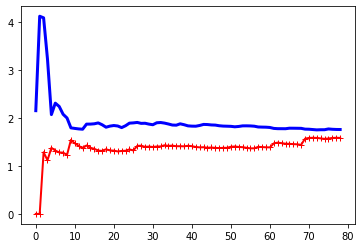

In [32]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [33]:
from sklearn.pipeline import Pipeline

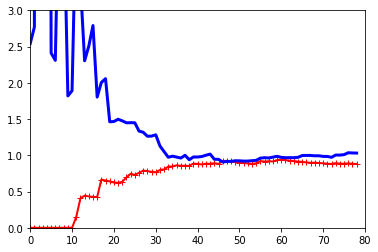

In [34]:
poly_reg = Pipeline([
    ("polynomial_features",PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_model", LinearRegression())
])
plt.xlim(0, 80)
plt.ylim(0, 3.0)
plot_learning_curve(poly_reg, X, y)

## Regularization

### Ridge regularization

In [35]:
from sklearn.linear_model import Ridge

In [36]:
redge_reg = Ridge(alpha=1, solver="cholesky")
redge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [37]:
redge_reg.predict([[1.5]])

array([[5.09437897]])

In [38]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.06110718])

### Lasso Regularization

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.0551941])

### ElasticNet Regularization

In [41]:
from sklearn.linear_model import ElasticNet

In [42]:
ela_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
ela_reg.fit(X,y)
ela_reg.predict([[1.5]])

array([5.05299689])

### Early stopping

In [43]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [44]:
poly_scaler = Pipeline([
    ("poly_reg", PolynomialFeatures(degree=90,include_bias=False)),
    ("standard_scaler", StandardScaler())
])

X_train_poly_scale = poly_scaler.fit_transform(x_train)
X_val_poly_scale = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

In [45]:
min_value_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scale, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scale)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < min_value_error:
        min_value_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\ML_PATH\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

## Logistic Regression

In [46]:
from sklearn import datasets

In [47]:
iris_data = datasets.load_iris()
list(iris_data.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [48]:
X = iris_data['data'][:,3:]
y = (iris_data['target']==2).astype(np.int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7540\1626210010.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris_data['target']==2).astype(np.int)


In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

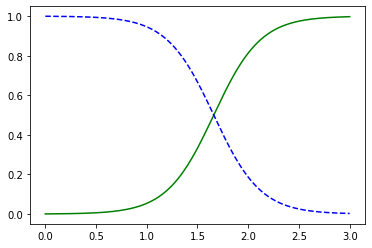

In [51]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regrassion

In [54]:
X = iris_data["data"][:, (2, 3)] 
y = iris_data["target"]

In [56]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [57]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])